<a href="https://colab.research.google.com/github/MikeAspinall/MikeAspinall.github.io/blob/main/Beer%20clustering%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beer analysis via k-means clustering**
Data set: https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set?select=beer_profile_and_ratings.csv
Summary of what to do:

*Data transformation*
* Load data
* Drop unecessary columns (PII etc)
* Assess data types and change if required
* Assess quality dimensions - duplicates, NaNs
* Feature engineering

*Exploratory data analysis*
* Look for correlations, any stories to tell
* Especially on the columns I plan to combine and use

*K-means clustering*
* Define the variables for the k-means
* Run k-means on 5-6 variables
* Run PCA to allow the results to be visualised in a 3D plot and to show clear separation in an easily visualised way
* Plot scatters, histograms, bar charts etc of key variables, colour coded by cluster
* Create pen portraits based on mean values of each data point

# **1. Data preparation**

### Load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import datetime
from google.colab import drive
drive.mount('/content/gdrive') # Connect to Google Drive to load the data

beer = pd.read_csv('/content/gdrive/MyDrive/Training + learning/Data Science apprenticeship degree/Modules/M5/k-means_public_dataset/beer_profile_and_ratings.csv')
print(beer.head()) # Initial check of the data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
                           Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  \
0                               Alaskan Brewing Co.   
1                            Long Trail Brewing Co.   
2                            Long Trail Brewing Co.   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                           Ninkasi Brewing Company   

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri

In [2]:
duplicate_name = beer.duplicated('Name').sum() # Count the number of duplicate rows in 'Name'
print(f"Number of duplicates in 'Name': {duplicate_name}")
duplicate_name_full = beer.duplicated('Beer Name (Full)').sum() # Count the number of duplicate rows in 'Beer Name (Full)'
print(f"Number of duplicates in 'Beer Name (Full)': {duplicate_name_full}")

Number of duplicates in 'Name': 131
Number of duplicates in 'Beer Name (Full)': 0


The 'Name' value was found to contain non-unique values, whereas 'Beer Name (Full)' contained no repeated values. Therefore, the 'Name' column was dropped. The brewery was not required for this project, so was also dropped.

In [3]:
columns_to_drop = ['Brewery', 'Name'] # Specify then delete unnecessary columns
beer = beer.drop(columns_to_drop, axis=1)
print(beer.head()) # Check the data is as expected

     Style                                   Beer Name (Full)  \
0  Altbier                  Alaskan Brewing Co. Alaskan Amber   
1  Altbier                  Long Trail Brewing Co. Double Bag   
2  Altbier              Long Trail Brewing Co. Long Trail Ale   
3  Altbier  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Altbier  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency  Body  Alcohol  Bitter  Sweet  Sour  Salty  Fruits  Hoppy  \
0           13    32        9      47     74    33      0 

### Data cleaning

In [4]:
print(beer.info()) # Check the data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Style              3197 non-null   object 
 1   Beer Name (Full)   3197 non-null   object 
 2   Description        3197 non-null   object 
 3   ABV                3197 non-null   float64
 4   Min IBU            3197 non-null   int64  
 5   Max IBU            3197 non-null   int64  
 6   Astringency        3197 non-null   int64  
 7   Body               3197 non-null   int64  
 8   Alcohol            3197 non-null   int64  
 9   Bitter             3197 non-null   int64  
 10  Sweet              3197 non-null   int64  
 11  Sour               3197 non-null   int64  
 12  Salty              3197 non-null   int64  
 13  Fruits             3197 non-null   int64  
 14  Hoppy              3197 non-null   int64  
 15  Spices             3197 non-null   int64  
 16  Malty              3197 

No PII or sensitive data to remove or consider. No unnecessary columns to delete either. All data types imported as expected.

### Data quality audit
Discuss dimensions of data quality etc

In [5]:
duplicate_count = beer.duplicated().sum() # Count the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [6]:
print('Count of null values per column')
beer.isnull().sum()

Count of null values per column


Style                0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

No null values or duplicates were found - this is a very clean dataset. However, if they were found, I could have done XXXX.

The continuous variables that would be used in the model were checked for outliers or other unexpected values or patterns.

<Axes: ylabel='Body'>

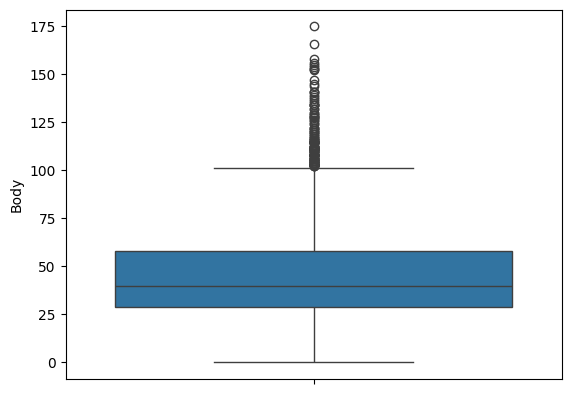

In [7]:
sns.boxplot(beer['Body'])

### Feature Engineering

The beer styles (categorical values) were checked to see the format of the values, and to ensure there were no obvious errors (such as typos or non-sensical values). This identified that the values were made of two components, representing two levels of categorisation, split by a dash.

In [8]:
print("\nStyle")
for index, value in beer['Style'].value_counts().items():
    print("\t",index, value)
print("\t","null", beer['Style'].isna().sum())


Style
	 Lager - Adjunct 45
	 Lager - European Pale 43
	 Wheat Beer - Hefeweizen 42
	 Stout - Irish Dry 42
	 Lambic - Fruit 42
	 Bitter - English 41
	 Strong Ale - Belgian Dark 41
	 Dubbel 41
	 Winter Warmer 40
	 Brown Ale - English 40
	 Strong Ale - Belgian Pale 40
	 Pale Ale - English 40
	 Bock - Doppelbock 40
	 Lager - Light 40
	 Lager - Märzen / Oktoberfest 39
	 Lager - European Strong 39
	 Altbier 39
	 IPA - American 38
	 Pilsner - German 38
	 Barleywine - American 38
	 Red Ale - Irish 38
	 IPA - English 37
	 Porter - English 37
	 Lager - Vienna 37
	 Fruit and Field Beer 37
	 Wheat Beer - Dunkelweizen 37
	 Tripel 37
	 Lager - Munich Dunkel 36
	 Stout - Foreign / Export 36
	 Lager - Helles 36
	 Wheat Beer - Witbier 36
	 Porter - American 36
	 Strong Ale - English 35
	 IPA - Imperial 35
	 Scotch Ale / Wee Heavy 35
	 Stout - Russian Imperial 35
	 Bock - Maibock 35
	 Lager - European / Dortmunder Export 35
	 Quadrupel (Quad) 34
	 Lager - American Amber / Red 34
	 Old Ale 34
	 Scottish

The 'Style' values were therefore split into two new columns: 'Style - level 1' and 'Style - level 2'. This would facilitate better analysis later on. The original column was then dropped.

In [9]:
beer[['Style - level 1','Style - level 2']] = beer['Style'].str.split(' - ',expand=True)
drop_columns = ['Style']
beer = beer.drop(drop_columns, axis=1)
print(beer.head())

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency  Body  Alcohol  Bitter  Sweet  Sour  Salty  Fruits  Hoppy  \
0           13    32        9      47     74    33      0      33     57   
1           12    57       18      3

# **2. Exploratory Data Analysis, EDA**

#### Summary metrics
Firstly, the summary metrics for all columns were investigated, to better understand the data.

In [12]:
beer.describe(include='all')

,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,Style - level 1,Style - level 2
count,3197,3197,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197,2519
unique,3197,1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,63
top,Alaskan Brewing Co. Alaskan Amber,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lager,English
freq,1,1347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,567,284
mean,NaN,NaN,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955,NaN,NaN
std,NaN,NaN,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000,NaN,NaN
25%,NaN,NaN,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000,NaN,NaN
50%,NaN,NaN,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000,NaN,NaN
75%,NaN,NaN,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000,NaN,NaN


##### Observations


*   There are 4 categorical variables. 'Beer Name (Full)' and 'Description' are unstructured, and contain unique (non duplicate) values. The 2 'Style' variables are more structured, and contain fewer unique values. Whilst none of the categorical values are approproate for the k-means clustering (without further transformation, such as one-hot encoding), they may be useful for further analysis later on.
*   All other variables are numerical.
*   The numerical values will henceforth be referred to as 'Basic variables' (ABV, Min IBU and Max IBU), 'Review variables' (review_aroma, review_appearance, review_palate, review_taste and review_overall), and 'Taste variables' (all other numerical columns).
*   The ranges of the taste variables differs between columns, for example 'Astringency' has a range 0-100, whereas 'Sour' ranges from 0-284. The data will therefore need normalising before the k-means clustering can be run.
*   The standard deviations vary notably between taste variables. Malty has the highest standard deviation (39.9), indicating a high spread of scores. Salty has a low standard deviation (2.1), and also a low maximum value (48), indicating the beers are all generally low saltiness, with little deviation in this metric between them.
*   The ABV range has a minimum of 0, indicating that alcohol-free beers are included in this data.
*   The ABV range has a maximum of 57.5, which is extremely strong and potentially indicates an outlier.
*   The reviews are scored on a 0-5 scale. They all have a mean average of approximately 3.7.



#### Correlation matrix
A correlation matrix of the taste variables was plotted to assess potential multicollinearity amongst the data.

Text(0.5, 1.0, 'Correlation of each variable all other variables')

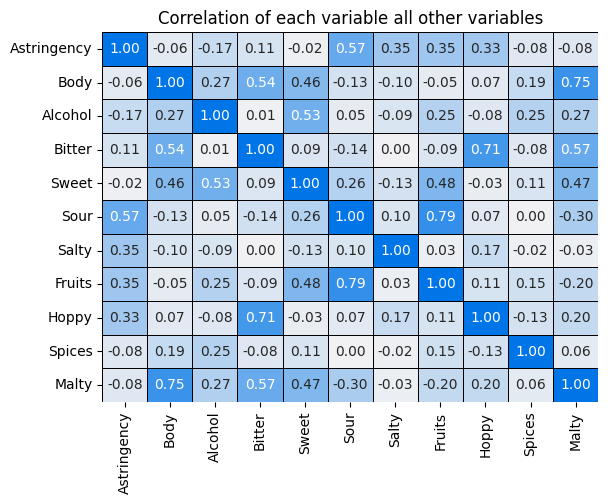

In [11]:
# Select the relevant columns
beer_subset = beer[['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]

# Define the correlation matrix
correlation_matrix = beer_subset.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, linecolor='black', cbar=False, cmap=sns.diverging_palette(255,255, s=100, as_cmap=True))
plt.title("Correlation of each variable all other variables")

##### Observations
Almost all variables displayed very little correlation with each other. The only variables showing a very strong correlation (>0.7) were:

*   Hoppy/Bitter
*   Fruits/Sour
*   Body/Malty

These are all unsurprising correlations. Given that the definitions of these correlating variables are distinct, despite their high correlation, it was decided to leave them in the dataset.

### Review tree chart
A tree chart was plotted to assess the review scores across each style of beer (Style - level 1). The size of the outer boxes represents the number of reviews that style has, and the colours correspond to the average scores of those reviews.

In [13]:
import plotly.express as px
import numpy as np

beer_tree = beer.copy()
fig_tree_weights = px.treemap(beer_tree, path=['Style - level 1', 'Beer Name (Full)'],
                      values = 'number_of_reviews',
                      color='review_overall',
                      color_continuous_scale='rdgy',
                      color_continuous_midpoint=np.average(beer_tree['review_overall'], weights=beer_tree['number_of_reviews']),
                      title = 'Beer reviews by style'
                     )

fig_tree_weights.update_layout(
    autosize=True,
    hovermode='closest',
    margin=dict(t=50, b=15, l=15, r=15))

fig_tree_weights.show()

#### Observations

*   Lager has the most reviews, and those reviews are generally quite poor compared to the other styles.
*   IPA, stout and strong ale also have a fairly large quantity of reviews, and generally score higher than lager.
*   Of the beers that have had fewer reviews, fruit and field beer, pumpkin beer, cream ale and low alcohol beer all have notably low reviews.
*   Wild ale has the highest overall review score at 4.27, although this is from a relatively low quantity of reviews.
*   Low alcohol beer has the lowest overall review score at 2.56, although this is from a relatively low quantity of reviews.



# **3. K-means clustering**

### **Data transformation**

The columns to be used in the k-means clusering algorithm are:

'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty'

Normalise the data first - explain why, find a reference

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Transform the selected columns into normalised values
beer[['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']] = scaler.fit_transform(beer[['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']])

# Print the transformed dataset
beer.loc[:,['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']].head()

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,0.160494,0.182857,0.064748,0.313333,0.281369,0.116197,0.000000,0.188571,0.331395,0.043478,0.464435
1,0.148148,0.325714,0.129496,0.220000,0.209125,0.056338,0.000000,0.137143,0.203488,0.065217,0.351464
2,0.172840,0.211429,0.043165,0.280000,0.163498,0.038732,0.000000,0.057143,0.313953,0.021739,0.259414
3,0.160494,0.314286,0.223022,0.313333,0.384030,0.063380,0.020833,0.280000,0.232558,0.086957,0.497908
4,0.308642,0.291429,0.187050,0.293333,0.171103,0.031690,0.020833,0.062857,0.296512,0.108696,0.397490


### **Decide the number of clusters (k)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

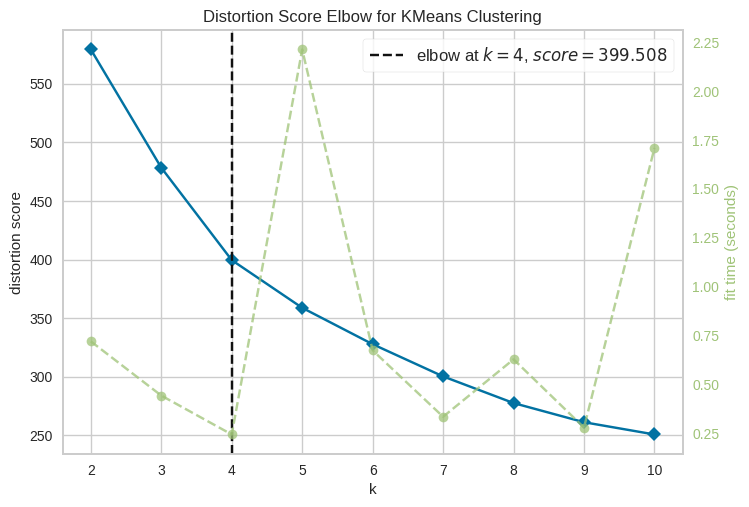

In [15]:
# Create a new dataframe with the input variables as the only columns
model_data = beer.filter(['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty'], axis=1)

from yellowbrick.cluster import KElbowVisualizer

# Plot an elbow curve across multiple k values
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(model_data)
Elbow_M.show();

### **Run the k-means clustering model**

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Initialize the model with 4 clusters (k=4)
km = KMeans(n_clusters=4, init='k-means++', max_iter=600, n_init=10)

# Fit the model to the data
km.fit(model_data)

# Add a new column containing the cluster labels
model_data['cluster'] = km.labels_

print(model_data.head())

   Astringency      Body   Alcohol    Bitter     Sweet      Sour     Salty  \
0     0.160494  0.182857  0.064748  0.313333  0.281369  0.116197  0.000000   
1     0.148148  0.325714  0.129496  0.220000  0.209125  0.056338  0.000000   
2     0.172840  0.211429  0.043165  0.280000  0.163498  0.038732  0.000000   
3     0.160494  0.314286  0.223022  0.313333  0.384030  0.063380  0.020833   
4     0.308642  0.291429  0.187050  0.293333  0.171103  0.031690  0.020833   

     Fruits     Hoppy    Spices     Malty  cluster  
0  0.188571  0.331395  0.043478  0.464435        1  
1  0.137143  0.203488  0.065217  0.351464        1  
2  0.057143  0.313953  0.021739  0.259414        0  
3  0.280000  0.232558  0.086957  0.497908        1  
4  0.062857  0.296512  0.108696  0.397490        1  


In [17]:
# Add the cluster label to the original customers table
beer = beer.merge(model_data[['cluster']], how='inner', left_index=True, right_index=True)

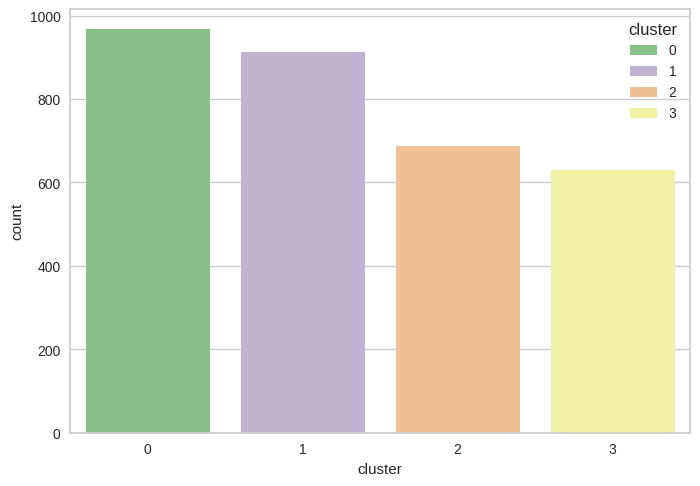

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart of the cluster sizes
sns.countplot(x='cluster', data=beer, hue='cluster', palette='Accent')
plt.show()

# **4. Analysis of the clusters**

A Pair Plot shows clear grouping of the clusters, and notable differentiation between the variables for each cluster. This indicates well defined, distinct groupings of beers. Some patterns are immediately clear even from this high-level view, for example Cluster 4 is displaying high levels of 'Hoppy' and 'Bitter' notes, but low 'Spices'. Cluster 1, however, appears to have high 'Sour' and 'Fruits' notes, but low 'Hoppy', 'Spices' and 'Malty'.

In [19]:
# sns.pairplot(beer, vars=['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty'], hue='cluster', palette='Accent')

In [20]:
beer_avgs = beer.groupby('cluster')[['Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']].mean().style.background_gradient(cmap='Blues')
beer_avgs

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
cluster,,,,,,,,,,,
0,0.152668,0.149346,0.073081,0.129231,0.119506,0.050891,0.019993,0.092498,0.149888,0.073608,0.203649
1,0.161834,0.427425,0.163251,0.333589,0.292355,0.059079,0.012404,0.140276,0.203342,0.114458,0.502505
2,0.262651,0.227342,0.163240,0.117762,0.301900,0.266034,0.022378,0.467350,0.149439,0.151147,0.217981
3,0.279267,0.241397,0.095912,0.420360,0.187996,0.138090,0.034458,0.261850,0.519795,0.062224,0.321405


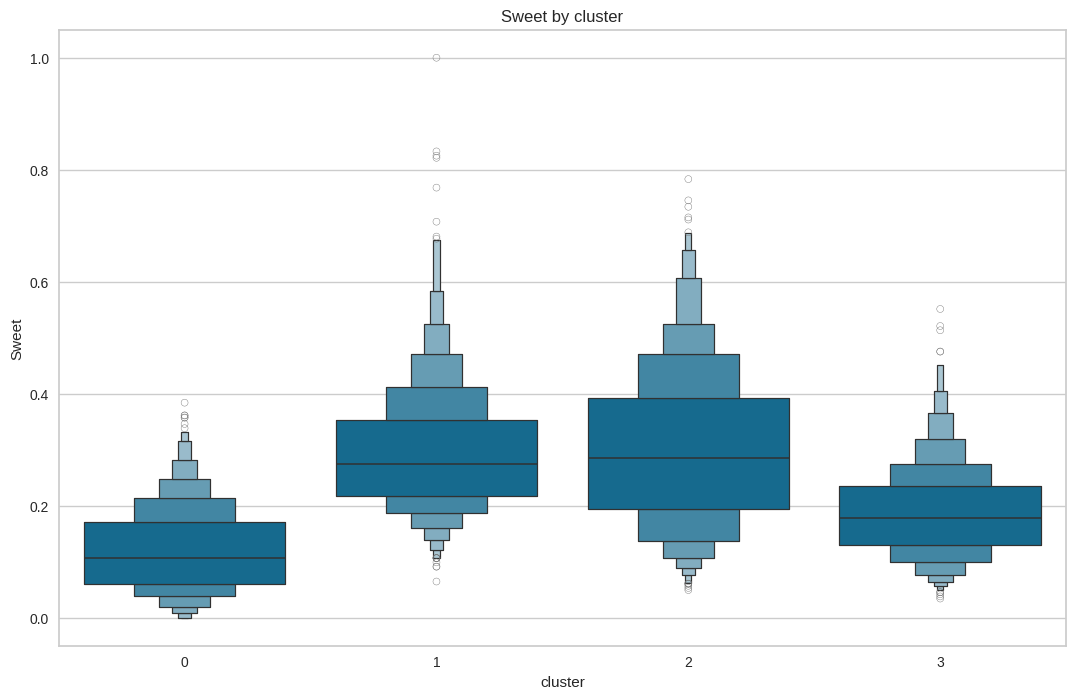

In [21]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=beer['Sweet'],x=beer['cluster'])
pl.set_title('Sweet by cluster');

In [22]:
beer_clusters_tree = beer.copy()
fig_tree_weights = px.treemap(beer_clusters_tree, path=['cluster', 'Beer Name (Full)'],
                      values = 'number_of_reviews',
                      color='review_overall',
                      color_continuous_scale='rdgy',
                      color_continuous_midpoint=np.average(beer_clusters_tree['review_overall'], weights=beer_clusters_tree['number_of_reviews']),
                      title = 'Beer reviews by style'
                     )

fig_tree_weights.update_layout(
    autosize=True,
    hovermode='closest',
    margin=dict(t=50, b=15, l=15, r=15))

fig_tree_weights.show()

In [23]:
print(beer.head())

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency      Body   Alcohol    Bitter     Sweet      Sour     Salty  \
0     0.160494  0.182857  0.064748  0.313333  0.281369  0.116197  0.000000   
1     0.148148  0.325714  0.1294

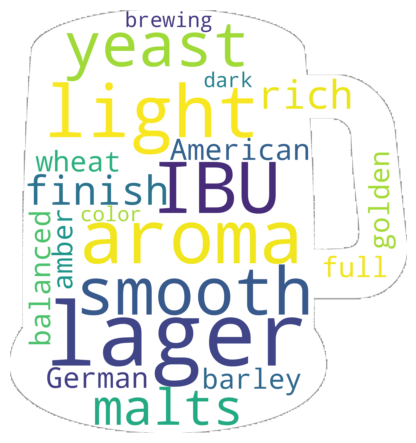

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the data to only include rows where the cluster is 0
beer_cluster_0 = beer[beer['cluster'] == 0]

# Define stop words to exclude from the wordcloud
stop_words = ['malt', 'hop', 'hops', 'beer', 'beers', 'taste', 'flavor', 'style', 'Note', 'Notes', 'brewed', 'ale', 'bottle', 'its', 'you', 's', 'a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 'no', 'not', 'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 'will', 'with', 't', 'our', 'we', 'has', 'your', 'from']

# Import the shape to use for the wordcloud
from PIL import Image
beer_mask = np.array(Image.open('/content/gdrive/MyDrive/Training + learning/Data Science apprenticeship degree/Modules/M5/k-means_public_dataset/beer-mug-silhouette.jpg'))

# Create a wordcloud of the 'Description' column
wordcloud = WordCloud(stopwords=stop_words, collocations=False, background_color='white', max_words=20, mask=beer_mask, contour_color='grey',contour_width=1).generate(' '.join(beer_cluster_0['Description']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

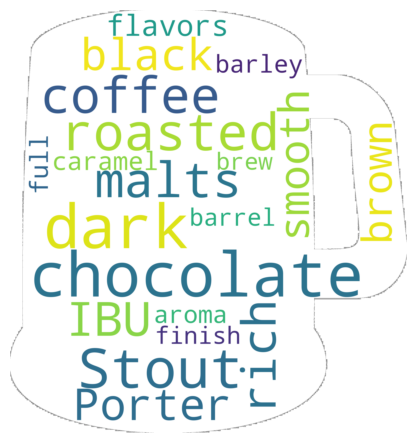

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the data to only include rows where the cluster is 0
beer_cluster_1 = beer[beer['cluster'] == 1]

# Create a wordcloud of the 'Description' column
wordcloud = WordCloud(stopwords=stop_words, collocations=False, background_color='white', max_words=20, mask=beer_mask, contour_color='grey',contour_width=1).generate(' '.join(beer_cluster_1['Description']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

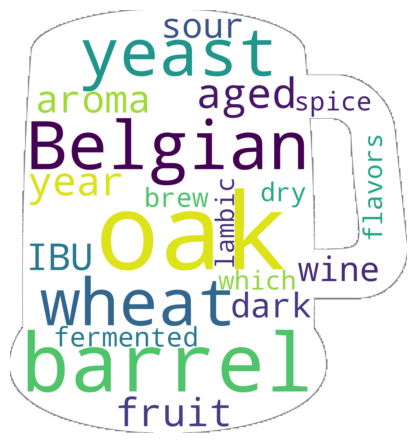

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the data to only include rows where the cluster is 0
beer_cluster_2 = beer[beer['cluster'] == 2]

# Create a wordcloud of the 'Description' column
wordcloud = WordCloud(stopwords=stop_words, collocations=False, background_color='white', max_words=20, mask=beer_mask, contour_color='grey',contour_width=2).generate(' '.join(beer_cluster_2['Description']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

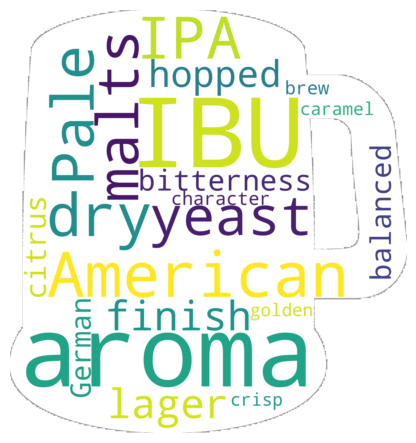

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the data to only include rows where the cluster is 0
beer_cluster_3 = beer[beer['cluster'] == 3]

# Create a wordcloud of the 'Description' column
wordcloud = WordCloud(stopwords=stop_words, collocations=False, background_color='white', max_words=20, mask=beer_mask, contour_color='grey',contour_width=1).generate(' '.join(beer_cluster_3['Description']))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()